<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/learning_without_teacher/HW1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')
df = df.drop(columns=['ID'])

In [ ]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [ ]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df)

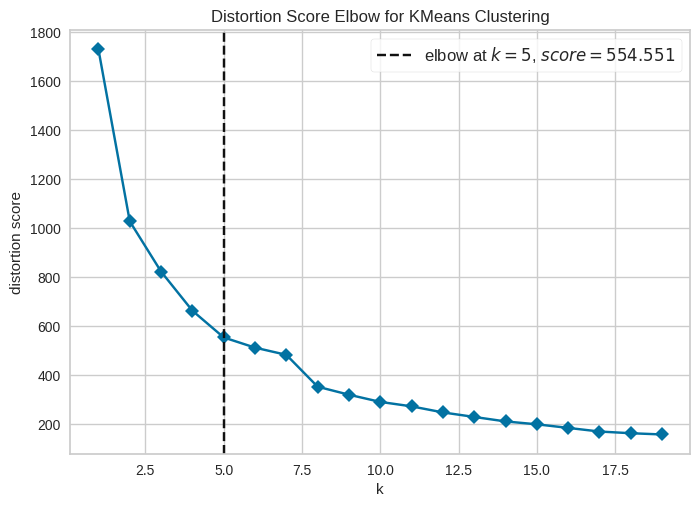

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


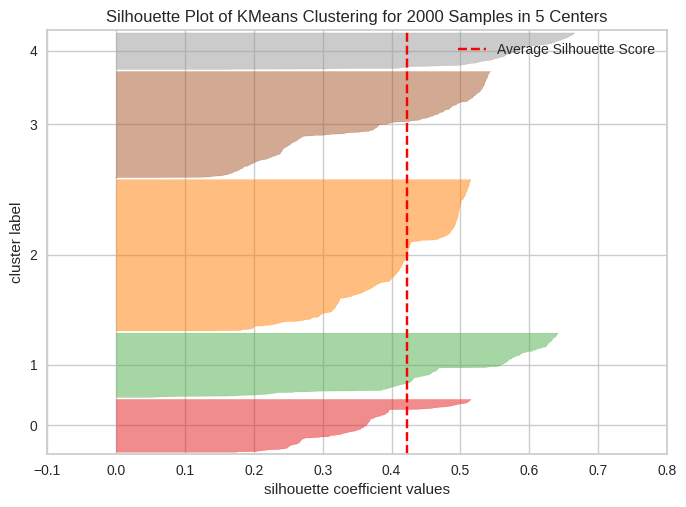

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(data)
visualizer.show()

In [ ]:
kmeans = KMeans(5)

kmeans.fit(data)

df['cluster_id'] = kmeans.labels_+1

df['Income'] = df['Income'] / 10000

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,0,0,67,2,12.4670,1,2,3
1,1,1,22,1,15.0773,1,2,2
2,0,0,49,1,8.9210,0,0,5
3,0,0,45,1,17.1565,1,1,3
4,0,0,53,1,14.9031,1,1,3


In [ ]:
df_1 = df.copy()

df_1.loc[df_1['Sex']==0,'Sex']='male'
df_1.loc[df_1['Sex']==1,'Sex']='female'

df_1.loc[df_1['Marital status']==0,'Marital status']='single'
df_1.loc[df_1['Marital status']==1,'Marital status']='non-single'

df_1.loc[df_1['Education']==0,'Education']='unknown'
df_1.loc[df_1['Education']==1,'Education']='high school'
df_1.loc[df_1['Education']==2,'Education']='universty'
df_1.loc[df_1['Education']==3,'Education']='graduate school'

df_1.loc[df_1['Occupation']==0,'Occupation']='unemployed'
df_1.loc[df_1['Occupation']==1,'Occupation']='skilled employee'
df_1.loc[df_1['Occupation']==2,'Occupation']='highly qualified employee'

df_1.loc[df_1['Settlement size']==0,'Settlement size']='small city'
df_1.loc[df_1['Settlement size']==1,'Settlement size']='mid-sized city'
df_1.loc[df_1['Settlement size']==2,'Settlement size']='big city'

df_1

<ipython-input-106-56aac2e6ed59>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[df_1['Sex']==0,'Sex']='male'
<ipython-input-106-56aac2e6ed59>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[df_1['Marital status']==0,'Marital status']='single'
<ipython-input-106-56aac2e6ed59>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[df_1['Education']==0,'Education']='unknown'
<ipython-input-106-56aac2e6ed59>:14: FutureWarning: Setting an item of incompatible dtype is de

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,male,single,67,universty,12.4670,skilled employee,big city,3
1,female,non-single,22,high school,15.0773,skilled employee,big city,2
2,male,single,49,high school,8.9210,unemployed,small city,5
3,male,single,45,high school,17.1565,skilled employee,mid-sized city,3
4,male,single,53,high school,14.9031,skilled employee,mid-sized city,3
...,...,...,...,...,...,...,...,...
1995,female,single,47,high school,12.3525,unemployed,small city,4
1996,female,non-single,27,high school,11.7744,skilled employee,small city,2
1997,male,single,31,unknown,8.6400,unemployed,small city,5
1998,female,non-single,24,high school,9.7968,unemployed,small city,2


In [ ]:
df_1['cluster_id'].value_counts()

,count
cluster_id,
2,736
3,516
5,313
1,257
4,178


In [ ]:
results = df.groupby(by='cluster_id').mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
1,0.0,1.0,33.968872,1.268482,12.297672,0.933852,0.918288
2,1.0,1.0,33.192935,1.262228,11.644217,0.741848,0.569293
3,0.0,0.0,40.007752,0.821705,14.532560,1.265504,1.532946
4,1.0,0.0,35.146067,0.932584,9.799724,0.370787,0.073034
5,0.0,0.0,37.565495,0.738019,10.278232,0.370607,0.060703


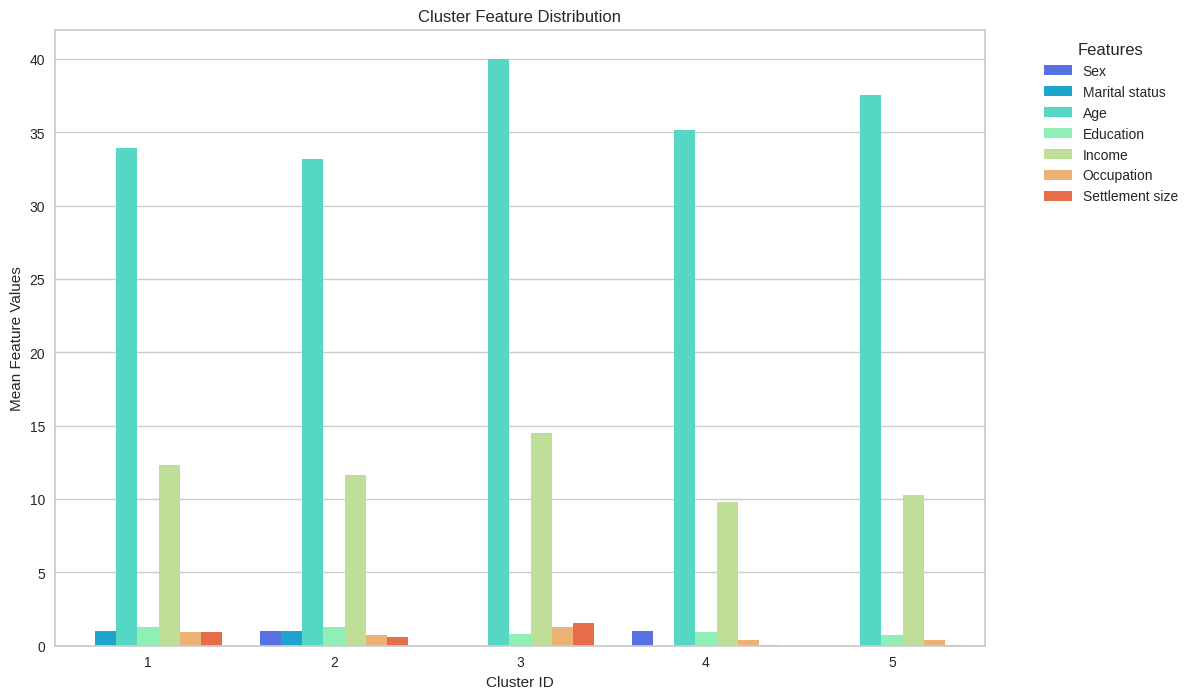

In [ ]:
import seaborn as sns

color = sns.color_palette("rainbow", results.shape[1])

results_melted = results.reset_index().melt(id_vars='cluster_id', var_name='Features', value_name='Values')

plt.figure(figsize=(12, 8))
sns.barplot(x='cluster_id', y='Values', hue='Features', data=results_melted, palette=color)

plt.title('Cluster Feature Distribution')
plt.xlabel('Cluster ID')
plt.ylabel('Mean Feature Values')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Перша група людей - чоловіки у стосунках середній вік 34 роки, здебільшого із середньою частково з вищою освітою, з досвідом роботи, з середніх за розміром міст, ЗП всередньому 120к

Друга група людей - жінки у стосунках середній вік 33 роки, здебільшого із середньою частково з вищою освітою, переважно досвідом роботи, з середніх за розміром та малих міст, ЗП всередньому 115к

Третя група людей - чоловіки без стосунків середній вік 40 років, переважно із середньою частково з невідомою освітою, частково з великим досвідом роботи, з середніх за розміром та великих міст, ЗП всередньому 140к

Четверта група людей - жінки без стосунків середній вік 35 років, переважно із середньою освітою, переважно без досвіду роботи, з малих міст, ЗП всередньому 97к

П'ята група людей - чоловіки без стосунків середній вік 37 років, переважно із середньою частково з невідомою освітою, переважно без досвіду роботи, з малих міст, ЗП всередньому 100к

Із цих даних можна зробити висновок що напйбільше на розмір ЗП впливає стаж та розмір міста